### 2023 KAKAO BLIND RECRUITMENT > [개인정보 수집 유효기간](https://school.programmers.co.kr/learn/courses/30/lessons/150370)

In [4]:
def solution(today, terms, privacies):
    terms = {x.split()[0]:x.split()[1] for x in terms}
    today = 12*int(today.split('.')[0]) + int(today.split('.')[1]) + int(today.split('.')[2]) / 28
    
    answer = []
    for i, privacy in enumerate(privacies):
        period, contract = privacy.split()
        period = 12*int(period.split('.')[0]) + int(period.split('.')[1]) + int(period.split('.')[2]) / 28
        
        duration = today - period
        if duration >= int(terms[contract]):
            answer.append(i+1)
        
    return answer

In [5]:
today = "2022.05.19"
terms = ["A 6", "B 12", "C 3"]
privacies = ["2021.05.02 A", "2021.07.01 B", "2022.02.19 C", "2022.02.20 C"]
solution(today, terms, privacies)

[1, 3]

### 2022 KAKAO BLIND RECRUITMENT > [신고 결과 받기](https://school.programmers.co.kr/learn/courses/30/lessons/92334)

In [1]:
def solution(id_list, report, k):
    report_list = {x:[0, []] for x in id_list} # user name : cnt, [user를 신고한 사람들]
    for r in report :
        a, b = r.split() # 신고한 사람, 신고당한 사람
        if a not in report_list[b][1]:
            report_list[b][0] += 1
            report_list[b][1].append(a)
    
    answer = {x:0 for x in id_list}
    for ids in id_list:
        if report_list[ids][0] >= k:
            report_names = report_list[ids][1]
            for name in report_names:
                answer[name] += 1

    return list(answer.values())

dict_values([0])

### [공원 산책](https://school.programmers.co.kr/learn/courses/30/lessons/172928)

In [82]:
def solution(park, routes):    
    cur_x, cur_y = [(idx, x.index('S')) for idx, x in enumerate(park) if 'S' in x][0] # 현재 위치
    height, width = len(park), len(park[0])
    
    directions = {'E':(0,1), 'W':(0,-1), 'S':(1,0), 'N':(-1,0)}
    for route in routes:
        op, n = route.split()
        dx, dy = directions[op]
        nexts = [(cur_x+i*dx, cur_y+i*dy) for i in range(1, int(n)+1)]
        filtered = [x for x in nexts if 0 <= x[0] < height and 0 <= x[1] < width and park[x[0]][x[1]] != 'X']
        if len(nexts) == len(filtered):
            cur_x, cur_y = nexts[-1][0], nexts[-1][1]
                
    return [cur_x, cur_y]

### [바탕화면 정리](https://school.programmers.co.kr/learn/courses/30/lessons/161990)

In [21]:
def solution(wallpaper):
    codes = []
    for idx, wall in enumerate(wallpaper) :
        code = [(idx, x_idx) for x_idx, x in enumerate(wall) if x == '#']
        codes += code
        
    x_min = min(codes, key=lambda x: x[0])[0]
    x_max = max(codes, key=lambda x: x[0])[0]
    y_min = min(codes, key=lambda x: x[1])[1]
    y_max = max(codes, key=lambda x: x[1])[1]
    return [x_min, y_min, x_max+1, y_max+1]

In [22]:
wallpaper = [".#...", "..#..", "...#."]
solution(wallpaper)

[(0, 1), (1, 2), (2, 3)]


[0, 1, 3, 4]

In [23]:
wallpaper = [".##...##.", "#..#.#..#", "#...#...#", ".#.....#.", "..#...#..", "...#.#...", "....#...."]	
solution(wallpaper)

[(0, 1), (0, 2), (0, 6), (0, 7), (1, 0), (1, 3), (1, 5), (1, 8), (2, 0), (2, 4), (2, 8), (3, 1), (3, 7), (4, 2), (4, 6), (5, 3), (5, 5), (6, 4)]


[0, 0, 7, 9]

### [하노이의 탑](https://school.programmers.co.kr/learn/courses/30/lessons/12946)

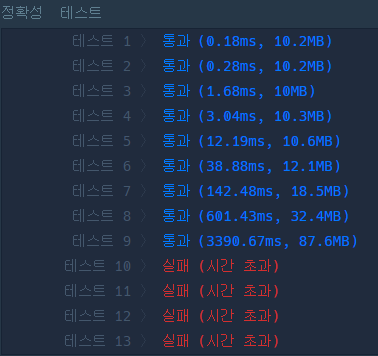

In [ ]:
from collections import deque

def solution(n):
    # 시작 상태: 1번 기둥에 n개의 원판, 2번과 3번 기둥은 비어 있음
    start = (tuple(range(n, 0, -1)), (), ())
    # 목표 상태: 3번 기둥에 모든 원판이 순서대로 쌓여 있음
    goal = ((), (), tuple(range(n, 0, -1)))
    # BFS를 위한 큐
    queue = deque([(start, [])])
    # 방문한 상태를 저장
    visited = set()
    visited.add(start)

    while queue:
        current, path = queue.popleft()
        # 목표 상태에 도달했을 경우
        if current == goal:
            return path
        
        # 각 기둥에서 다른 기둥으로 원판을 이동
        for i in range(3):
            if current[i]:
                for j in range(3):
                    if i != j:
                        # 원판을 옮길 수 있는 조건 확인
                        if not current[j] or current[i][-1] < current[j][-1]:
                            new_state = list(current)
                            moved_disk = new_state[i][-1]
                            new_state[i] = new_state[i][:-1]
                            new_state[j] = new_state[j] + (moved_disk,)
                            new_state_tuple = tuple(new_state)
                            if new_state_tuple not in visited:
                                visited.add(new_state_tuple)
                                queue.append((new_state_tuple, path + [(i+1, j+1)]))

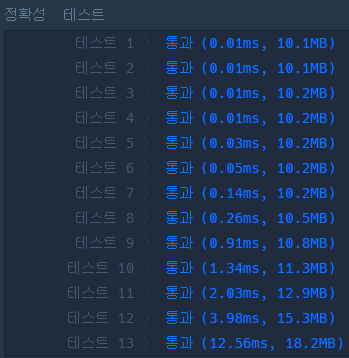

In [27]:
def hanoi(n, start, end, temp, moves):
    if n == 1:
        moves.append((start, end))
        print(moves)
        return
    hanoi(n-1, start, temp, end, moves)
    moves.append((start, end))
    hanoi(n-1, temp, end, start, moves)

def solution(n):
    moves = []
    hanoi(n, 1, 3, 2, moves)
    return moves

In [28]:
solution(2)

[(1, 2)]
scout01: [(1, 2), (1, 3)]
[(1, 2), (1, 3), (2, 3)]


[(1, 2), (1, 3), (2, 3)]

### 완전탐색 > [카펫](https://school.programmers.co.kr/learn/courses/30/lessons/42842)

- 방정식을 세운 뒤, 이를 연산하는 코드를 작성

In [29]:
def solution(brown, yellow):
    x = brown + yellow
    factor_pairs = [(i, x // i) for i in range(1, int(x**0.5) + 1) if x % i == 0]
    
    for h, w in factor_pairs:
        if (2*h+2*w-4==brown) and ((h-2)*(w-2)==yellow):
            return [w,h]

자연수 쌍: [(1, 36), (2, 18), (3, 12), (4, 9), (6, 6)]


### 스택/큐 > [프로세스](https://school.programmers.co.kr/learn/courses/30/lessons/42587)

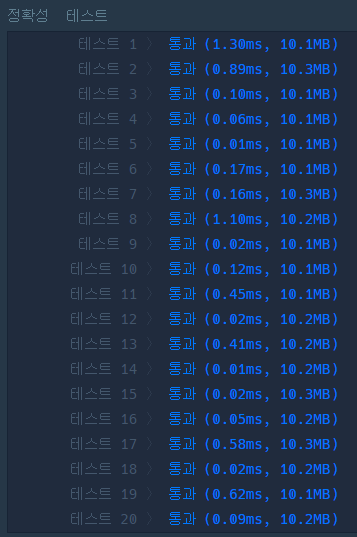

In [151]:
import heapq

def solution(priorities, location):
    processes = [(-p, idx, 0) for idx, p in enumerate(priorities)]
    heapq.heapify(processes)
    
    n = len(priorities)
    answer = 0
    while processes:
        _, idx, cnt = heapq.heappop(processes)
        answer += 1
        if idx - cnt*n == location:
            return answer        
        processes = [(p, i if i > idx else i+n, cnt if i > idx else cnt+1) for p, i, cnt in processes]
        heapq.heapify(processes)

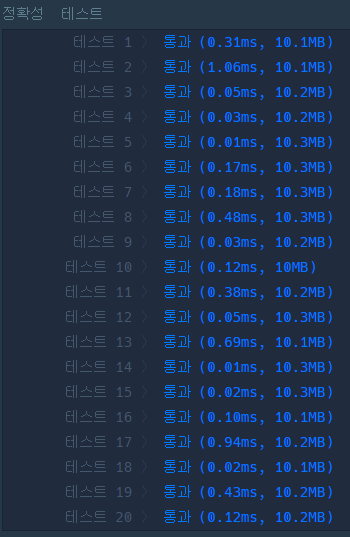

In [ ]:
def solution(priorities, location):
    queue =  [(i,p) for i,p in enumerate(priorities)]
    answer = 0
    while True:
        cur = queue.pop(0)
        if any(cur[1] < q[1] for q in queue):
            queue.append(cur)
        else:
            answer += 1
            if cur[0] == location:
                return answer

In [154]:
priorities = [2, 1, 3, 2]
location = 2 
solution(priorities, location)

1

In [162]:
queue =  [(i,p) for i,p in enumerate(priorities)]
cur = queue.pop(0)
cur

(0, 2)

In [153]:
priorities = [1, 1, 9, 1, 1, 1]
location = 0 
solution(priorities, location)

5

In [45]:
priorities = [1, 1, 9, 1, 1, 1]
location = 0 
solution(priorities, location)

[(0, 1), (1, 1), (2, 9), (3, 1), (4, 1), (5, 1)]
(5, 1)
